# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** Miftakhul Ma'firoh
- **Email:** miftakhulfiroh@gmail.com
- **ID Dicoding:** miftakhulfiroh

## Menentukan Pertanyaan Bisnis

- Bagaimana tren konsentrasi PM2.5 dan PM10 tahun 2013-2017?
- Bagaimana kondisi gas polutan CO di stasiun Changping pada tahun 2016?

## Import Semua Packages/Library yang Digunakan

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [54]:
datachangping_df = pd.read_csv('Data\PRSA_Data_Changping_20130301-20170228.csv')
datachangping_df

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\HP\AppData\Local\Temp\ipykernel_31668\323523147.py:1: SyntaxWarning: invalid escape sequence '\P'
  datachangping_df = pd.read_csv('Data\PRSA_Data_Changping_20130301-20170228.csv')


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


**Insight:**
Dataset di atas merupakan data yang digunakan untuk mengukur kualitas udara di Stasiun Changping, Beijing pada tahun 2013 hingga tahun 2017. Dataset di atas terdiri dari 35064 baris dan 18 kolom.
- No : Nomor baris
- Year: Menunjukkan tahun pengukuran kualitas udara
- Month: Menunjukkan bulan pengukuran kualitas udara
- Day: Menunjukkan hari pengukuran kualitas udara
- Hour: Menunjukkan jam pengukuran kualitas udara
- PM2.5: Partikel udara yang berukuran diameter 2.5 mikrometer (ug/m^3)
- PM10: Partikel udara yang berukuran diameter 10 mikrometer (ug/m^3)
- SO2: Gas sulfur dioksida (ug/m^3)
- NO2: Gas nitrogen dioksida (ug/m^3)
- CO: Gas karbon monoksida (ug/m^3)
- O3: Gas ozon (ug/m^3)
- TEMP: Suhu udara (derajat celcius)
- PRES: Tekanan udara (hPa)
- DEWP: Titik embun (derajat celcius)
- RAIN: Curah hujan (mm)
- wd: Arah angin
- WSPM: Kecepatan angin (m/s)
- station: Menunjukkan lokasi pengambilan data kualitas udara

### Assessing Data

In [55]:
datachangping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Dari 18 kolom dataset diatas, terdapat missing values pada kolom (PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN).

In [56]:
datachangping_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

Jumlah missing values pada setiap kolom adalah sebagai berikut:

- Pada kolom PM2.5 terdapat missing values sebanyak 774
- Pada kolom PM10 terdapat missing values sebanyak	582
- Pada kolom SO2 terdapat missing values sebanyak	628
- Pada kolom NO2 terdapat missing values sebanyak	667
- Pada kolom CO terdapat missing values sebanyak	1521
- Pada kolom O3 terdapat missing values sebanyak	604
- Pada kolom TEMP terdapat missing values sebanyak	53
- Pada kolom PRES terdapat missing values sebanyak	50
- Pada kolom DEWP terdapat missing values sebanyak	53
- Pada kolom RAIN terdapat missing values sebanyak	51
- Pada kolom wd terdapat missing values sebanyak	140
- Pada kolom WSPM terdapat missing values sebanyak	43

Berdasarkan informasi tersebut, untuk menghilangkan missing values dari tiap kolom maka perlu ditangani saat di tahap cleaning data.

In [57]:
print("Duplikasi: ", datachangping_df.duplicated().sum())

Duplikasi:  0


Tidak terdapat duplikasi data

In [58]:
datachangping_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


### Cleaning Data

In [59]:
#Mapping data
datachangping_df.replace({
    "month": {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"},
    "wd": {"N": "North", "NNE": "North-northeast", "NE": "Northeast", "ENE": "East-northeast", "E": "East", "ESE": "East-southeast", "SE": "Southeast", "SSE": "South-southeast", "S": "South", "SSW": "South-southwest", "SW": "Southwest", "WSW": "West-southwest", "W": "West", "WNW": "West-northwest", "NW": "Northwest", "NNW": "North-northwest"}
}, inplace=True)

In [60]:
datachangping_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,March,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,East,0.5,Changping
1,2,2013,March,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,East-northeast,0.7,Changping
2,3,2013,March,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,East-northeast,0.2,Changping
3,4,2013,March,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,North-northeast,1.0,Changping
4,5,2013,March,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,North,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,February,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,North-northeast,1.3,Changping
35060,35061,2017,February,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,North,2.1,Changping
35061,35062,2017,February,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,North,1.5,Changping
35062,35063,2017,February,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,Northwest,1.4,Changping


In [61]:
datachangping_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [62]:
# Menghilangkan nilai missing value
# Pada PM2.5
mean_PM25 = datachangping_df['PM2.5'].mean()
datachangping_df.fillna({'PM2.5' : mean_PM25}, inplace=True)
# Pada PM10
mean_PM10 = datachangping_df['PM10'].mean()
datachangping_df.fillna({'PM10' : mean_PM10}, inplace=True)
# Pada SO2
mean_SO2 = datachangping_df['SO2'].mean()
datachangping_df.fillna({'SO2' : mean_SO2}, inplace=True)
# Pada NO2
mean_NO2 = datachangping_df['NO2'].mean()
datachangping_df.fillna({'NO2' : mean_NO2}, inplace=True)
# Pada CO
mean_CO = datachangping_df['CO'].mean()
datachangping_df.fillna({'CO' : mean_CO}, inplace=True)
# Pada O3
mean_O3 = datachangping_df['O3'].mean()
datachangping_df.fillna({'O3' : mean_O3}, inplace=True)
# Pada TEMP
mean_TEMP = datachangping_df['TEMP'].mean()
datachangping_df.fillna({'TEMP' : mean_TEMP}, inplace=True)
# Pada PRES
mean_PRES = datachangping_df['PRES'].mean()
datachangping_df.fillna({'PRES' : mean_PRES}, inplace=True)
# Pada DEWP
mean_DEWP = datachangping_df['DEWP'].mean()
datachangping_df.fillna({'DEWP' : mean_DEWP}, inplace=True)
# Pada RAIN
mean_RAIN = datachangping_df['RAIN'].mean()
datachangping_df.fillna({'RAIN' : mean_RAIN}, inplace=True)
# Pada wd
mode_wd = datachangping_df['wd'].mode()[0]
datachangping_df.fillna({'wd' : mode_wd}, inplace=True)
# Pada WSPM
mean_WSPM = datachangping_df['WSPM'].mean()
datachangping_df.fillna({'WSPM' : mean_WSPM}, inplace=True)

print(datachangping_df)

          No  year     month  day  hour  PM2.5  PM10   SO2   NO2     CO  \
0          1  2013     March    1     0    3.0   6.0  13.0   7.0  300.0   
1          2  2013     March    1     1    3.0   3.0   6.0   6.0  300.0   
2          3  2013     March    1     2    3.0   3.0  22.0  13.0  400.0   
3          4  2013     March    1     3    3.0   6.0  12.0   8.0  300.0   
4          5  2013     March    1     4    3.0   3.0  14.0   8.0  300.0   
...      ...   ...       ...  ...   ...    ...   ...   ...   ...    ...   
35059  35060  2017  February   28    19   28.0  47.0   4.0  14.0  300.0   
35060  35061  2017  February   28    20   12.0  12.0   3.0  23.0  500.0   
35061  35062  2017  February   28    21    7.0  23.0   5.0  17.0  500.0   
35062  35063  2017  February   28    22   11.0  20.0   3.0  15.0  500.0   
35063  35064  2017  February   28    23   20.0  25.0   6.0  28.0  900.0   

              O3  TEMP    PRES  DEWP  RAIN               wd  WSPM    station  
0      85.000000  -2

In [63]:
datachangping_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [64]:
datachangping_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,March,1,0,3.0,6.0,13.0,7.0,300.0,85.000000,-2.3,1020.8,-19.7,0.0,East,0.5,Changping
1,2,2013,March,1,1,3.0,3.0,6.0,6.0,300.0,85.000000,-2.5,1021.3,-19.0,0.0,East-northeast,0.7,Changping
2,3,2013,March,1,2,3.0,3.0,22.0,13.0,400.0,74.000000,-3.0,1021.3,-19.9,0.0,East-northeast,0.2,Changping
3,4,2013,March,1,3,3.0,6.0,12.0,8.0,300.0,81.000000,-3.6,1021.8,-19.1,0.0,North-northeast,1.0,Changping
4,5,2013,March,1,4,3.0,3.0,14.0,8.0,300.0,81.000000,-3.5,1022.3,-19.4,0.0,North,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,February,28,19,28.0,47.0,4.0,14.0,300.0,57.940003,11.7,1008.9,-13.3,0.0,North-northeast,1.3,Changping
35060,35061,2017,February,28,20,12.0,12.0,3.0,23.0,500.0,64.000000,10.9,1009.0,-14.0,0.0,North,2.1,Changping
35061,35062,2017,February,28,21,7.0,23.0,5.0,17.0,500.0,68.000000,9.5,1009.4,-13.0,0.0,North,1.5,Changping
35062,35063,2017,February,28,22,11.0,20.0,3.0,15.0,500.0,72.000000,7.8,1009.6,-12.6,0.0,Northwest,1.4,Changping


In [65]:
# Menyimpan data yang telah dibersihkan ke file CSV
data_clean = 'Dashboard\data_clean.csv'
datachangping_df.to_csv(data_clean, index=False)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_31668\1239832203.py:2: SyntaxWarning: invalid escape sequence '\d'
  data_clean = 'Dashboard\data_clean.csv'


**Insight:**
- Melakukan mapping data agar data dapat dibaca dengan jelas
- Menghilangkan nilai missing value dengan cara menggantikan nilai-nilai yang hilang (NaN) dengan nilai tertentu.

## Exploratory Data Analysis (EDA)

### Explore ...

In [66]:
datachangping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  object 
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(4), object(3)
memory usage: 4.8+ MB


<Axes: >

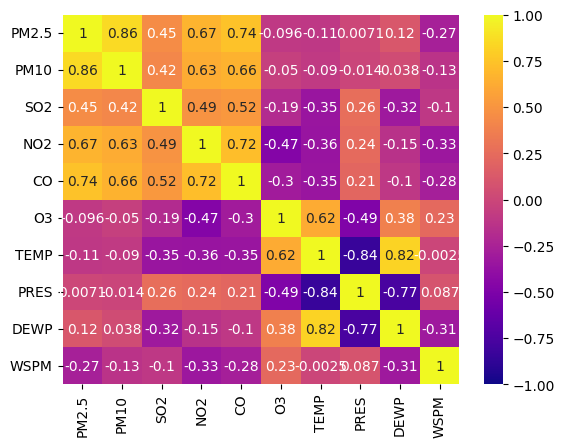

In [67]:
# Analisis korelasi antar kolom dengan menggunakan heatmap
Korelasi = datachangping_df[['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','WSPM']].corr()
Korelasi
sns.heatmap(Korelasi, annot=True,cmap="plasma", vmin=-1,vmax=1)

Pada heatmap korelasi terdapat tiga nilai korelasi, yaitu:

  1) Nilai 1 yaitu nilai korelasi positif sempurna, hal ini menunjukkan adanya korelasi yang kuat.
  
  2) Nilai 0 yaitu tidak terdapat korelasi.

  3) Nilai -1 yaitu nilai korelasi negatif sempurna, hal ini menunjukkan adanya korelasi yang lemah.

In [68]:
# Trend konsentrasi PM2.5 dan PM10 berdasarkan tahun
datachangping_df.groupby(by="year").agg({"PM2.5": ["mean"],
                           "PM10": ["mean"]})

,PM2.5,PM10
,mean,mean
year,,
2013,72.637567,91.257159
2014,79.144216,106.318472
2015,69.672148,94.153708
2016,61.778503,86.422490
2017,80.012286,94.364091


Konsentrasi PM10 selalu lebih tinggi daripada PM2.5 selama periode 2013-2017

In [69]:
# Trend konsentrasi gas SO2, NO2, CO, O3 berdasarkan tahun
datachangping_df.groupby(by="year").agg({"SO2": ["mean"],
                                         "NO2": ["mean"],
                                         "CO": ["mean"],
                                         "O3": ["mean"]})

,SO2,NO2,CO,O3
,mean,mean,mean,mean
year,,,,
2013,19.231476,41.251464,1052.052075,61.399195
2014,20.958338,45.557611,1195.430974,63.080795
2015,11.841341,42.799284,1161.859538,57.912187
2016,8.277616,45.548925,1123.589296,53.904720
2017,16.417615,50.947550,1524.400162,33.400410


Konsentrasi NO2 dan CO relatif stabil dari tahun 2013 hingga 2016, tetapi mengalami peningkatan signifikan pada tahun 2017.

In [70]:
# Trend konsentrasi gas SO2, NO2, CO, O3 berdasarkan bulan
datachangping_df['year_month'] = datachangping_df['year'].astype(str) + '-' + datachangping_df['month'].astype(str)
order_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
datachangping_df['month'] = pd.Categorical(datachangping_df['month'], categories=order_month, ordered=True)
pd.pivot_table(data=datachangping_df,
               observed=True,
               index='month',
               columns='year',
               values=['SO2', 'NO2', 'CO', 'O3'],
               aggfunc='mean')

CO                                                      \
year              2013         2014         2015         2016         2017   
month                                                                        
January            NaN  1999.937581  2037.466821  1491.538444  1879.793158   
February           NaN  2049.507501  1417.870841   949.226303  1130.929345   
March      1381.876269  1308.064516  1146.414273  1152.206215          NaN   
April       794.835197   928.610538   680.284170   763.886567          NaN   
May         872.044370   744.354839   642.760495   600.043305          NaN   
June       1209.513058   703.495471   795.907723   651.269178          NaN   
July        905.438905   881.647886   604.569892   957.826631          NaN   
August      793.194653   746.908602   506.201355   877.770842          NaN   
September   945.144157   916.467922   737.961415   802.630174          NaN   
October     946.487400  1229.956251   872.036270  1164.950287          NaN   
November   1086.903767  1502.036263  1870.799048  1797.096119          NaN   
December   1579.540653  1393.252577  2636.672742  2247.911326          NaN   

                 NO2                                                     O3  \
year            2013       2014       2015       2016       2017       2013   
month                                                                         
January          NaN  56.143456  63.136367  55.224952  55.387586        NaN   
February         NaN  58.194820  44.428167  43.886366  46.031796        NaN   
March      59.324451  53.619868  47.397061  59.847637        NaN  59.948029   
April      36.858248  48.446111  36.143561  43.359221        NaN  67.641410   
May        38.077282  36.517904  28.560243  34.596533        NaN  94.292221   
June       31.841348  31.404432  25.714158  31.807956        NaN  83.166391   
July       25.992526  32.894680  23.262097  27.453571        NaN  81.158833   
August     24.934620  35.984140  22.644186  27.753912        NaN  90.456397   
September  41.941981  35.231289  38.370713  37.417185        NaN  54.319430   
October    55.494926  54.920346  47.688806  53.456014        NaN  30.502987   
November   47.651766  56.528437  59.359221  61.923487        NaN  27.207347   
December   50.180957  47.686222  76.669969  69.505011        NaN  24.871095   

                                                               SO2             \
year             2014        2015       2016       2017       2013       2014   
month                                                                           
January     26.662527   25.296667  29.467661  29.529328        NaN  57.354231   
February    28.089048   40.212440  45.065920  37.686250        NaN  59.239176   
March       44.684758   52.986237  44.549785        NaN  34.914412  34.607527   
April       75.654306   76.322056  62.714194        NaN  16.697402  15.867123   
May         95.679301   91.820833  85.680645        NaN  23.327701  12.308737   
June       107.955917   88.833833  98.267306        NaN  14.338361   5.837234   
July       113.304839  101.969086  94.973817        NaN   6.598315   5.629272   
August     108.978629   89.299247  78.035887        NaN   7.065991   4.777823   
September   64.993778   59.238528  56.267611        NaN   7.134748   5.397051   
October     32.266479   41.025834  23.871828        NaN  12.827823   6.608171   
November    26.349917   12.703417  13.276389        NaN  24.884737  17.868489   
December    29.693763   13.700968  14.596210        NaN  44.077830  28.456161   

                                            
year            2015       2016       2017  
month                                       
January    37.148752  16.416611  17.071126  
February   28.586065  13.071426  15.694084  
March      20.684814  12.550523        NaN  
April       6.223097   7.610369        NaN  
May         6.088489   6.282884        NaN  
June        5.098878   4.049543        NaN  
July        4.300910   3.256113        NaN

1) CO (Karbon Monoksida):
    
- Konsentrasi CO cenderung lebih tinggi pada bulan-bulan musim dingin (Desember, Januari, Februari) dan lebih rendah pada bulan-bulan musim panas (Juni, Juli, Agustus).

2) NO2 (Nitrogen Dioksida):

- Konsentrasi NO2 cenderung lebih tinggi pada bulan-bulan musim dingin dan lebih rendah pada bulan-bulan musim panas.

3)O3 (Ozon):

- Konsentrasi O3 cenderung lebih tinggi pada bulan-bulan musim panas (Juni, Juli, Agustus) dan lebih rendah pada bulan-bulan musim dingin (Desember, Januari, Februari).

4) SO2 (Sulfur Dioksida):

- Konsentrasi SO2 cenderung lebih tinggi pada bulan-bulan musim dingin dan lebih rendah pada bulan-bulan musim panas.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren konsentrasi PM2.5 dan PM10 tahun 2013-2017?

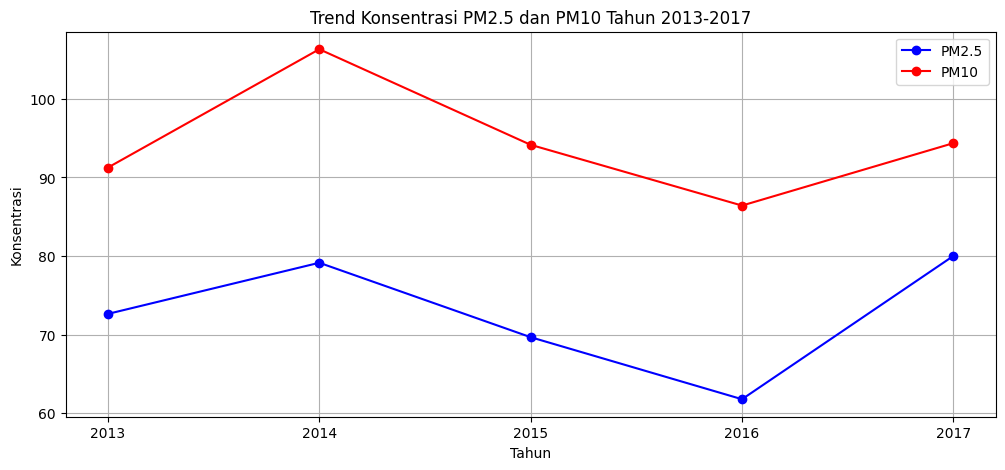

In [71]:
datachangping_df['year'] = datachangping_df['year'].astype(str)
tren_tahunan = datachangping_df.groupby(by="year").agg({"PM2.5": ["mean"],
                                         "PM10": ["mean"]})

plt.figure(figsize=(12, 5))
plt.plot(tren_tahunan.index.astype(str), tren_tahunan['PM2.5'], marker='o', linestyle='-', color='blue', label='PM2.5')
plt.plot(tren_tahunan.index.astype(str), tren_tahunan['PM10'], marker='o', linestyle='-', color='red', label='PM10')

plt.title("Trend Konsentrasi PM2.5 dan PM10 Tahun 2013-2017")
plt.xlabel("Tahun")
plt.ylabel("Konsentrasi")
plt.legend()
plt.grid(True)
plt.show()

- Grafik ini menunjukkan bahwa konsentrasi PM10 selalu lebih tinggi daripada PM2.5 selama periode 2013-2017.
- Kedua jenis partikulat mengalami peningkatan konsentrasi pada tahun 2014, diikuti penurunan hingga 2016 dan mengalami kenaikan kembali pada tahun 2017.

### Pertanyaan 2: Bagaimana kondisi gas polutan CO di stasiun Changping pada tahun 2016?

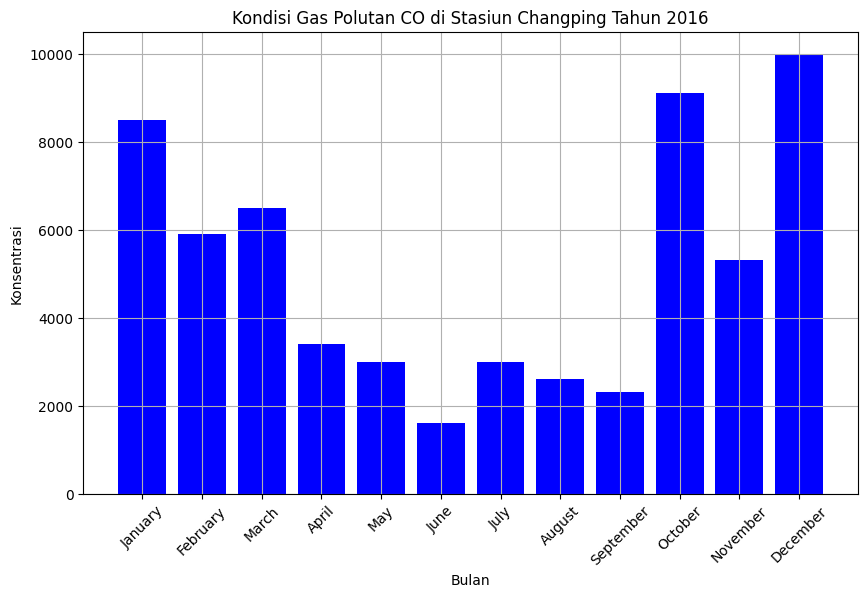

In [72]:
#kondisi gas polutan CO di stasiun changping pada tahun 2016
datachangping_df['year'] = datachangping_df['year'].astype(str)
tahun_2016 = datachangping_df[datachangping_df['year'] == '2016']
tahun_2016.groupby(by="year").agg({"CO": ["mean"]})
order_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
datachangping_df['month'] = pd.Categorical(datachangping_df['month'], categories=order_month, ordered=True)
pd.pivot_table(data=tahun_2016,
               observed=True,
               index='month',
               columns='year',
               values=['CO'],
               aggfunc='mean')

#data visualisai menggunakan barchart
plt.figure(figsize=(10, 6))
plt.bar(tahun_2016['month'], tahun_2016['CO'], label='CO', color='blue')
plt.title("Kondisi Gas Polutan CO di Stasiun Changping Tahun 2016")
plt.xlabel("Bulan")
plt.ylabel("Konsentrasi")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


- Konsentrasi CO di Stasiun Changping pada tahun 2016 menunjukkan pola musiman.
- Konsentrasi CO cenderung lebih tinggi pada bulan-bulan musim dingin (Januari, Oktober, November, Desember) dan lebih rendah pada bulan-bulan musim panas (Juni).
- Terdapat peningkatan tajam konsentrasi CO pada bulan Oktober, November, dan Desember.

## Conclusion

- Conclution pertanyaan 1

Konsentrasi PM10 selalu lebih tinggi daripada PM2.5 selama periode 2013-2017. Kedua jenis partikulat mengalami peningkatan konsentrasi pada tahun 2014, diikuti penurunan hingga 2016 dan mengalami kenaikan kembali pada tahun 2017.


- Conclution pertanyaan 2

Pola musiman konsentrasi CO mungkin disebabkan oleh faktor-faktor seperti perubahan suhu, aktivitas manusia (misalnya, penggunaan kendaraan), dan kondisi cuaca. Peningkatan tajam konsentrasi CO pada bulan Oktober, November, dan Desember mungkin disebabkan oleh peningkatan aktivitas industri, lalu lintas, atau faktor lain yang perlu diselidiki lebih lanjut.